## Ensemble Techniques - Project


## Overview

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from functools import reduce
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# calculate accuracy measures and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


## 1. Load the dataset


In [ ]:
df=pd.read_csv('parkinsons.data')

In [ ]:
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
## number of structure of the file, number of attributes, types of attributes and a general
## idea of likely challenges in the dataset. (2.5 points)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [ ]:
df.shape

(195, 24)

In [ ]:
# Lets check the data distribution across different columns

#status - Health status of the subject :
#(1) - Parkinson's
#(0) - healthy

df.groupby('status').count()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                                  
0         48           48            48            48              48   
1        147          147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
status                                                                  ...   
0                     48        48        48          48            48  ...   
1                    147       147       147         147           147  ...   

        MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
status                                                                          
0             48           48   48   48    48   48       48       48   48   48  
1            147          147  147  147   147  147      147      147  147  147  

[2 rows x 23 columns]

In [ ]:
# Lets check if all the columns except name has any non- numeric values

# df.iloc[:,1:][~df.iloc[:,1:].applymap(np.isreal).all(1)]

In [ ]:
# checking for any missing values
df.isna().sum().any()

False

In [ ]:
# No Missing Values Found

In [ ]:
#checking for null values
df.isnull().sum().any()

False

In [ ]:
# No Null Values Found

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic
## statistic such as central values, spread, tails etc. What are your observations? (15 points)


In [ ]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367


<font color=blue size="5">**Univariate Analysis**</font>


In [ ]:
df.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

<font color=blue size="4">**Kurtosis with positive values indicates that those attributes have more data points around the tail**</font>

In [ ]:
df.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64


<font color=blue size="4">**Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left**</font>

In [ ]:
#this is a common method for performing univariate analysis and also fixing outliers if any

def Univariate_Analysis(col):
    print("\n      ----------------------------UNIVARIATE ANALYSIS for {}----------------------------\n".format(col))
    fg, axs = plt.subplots(1, 2, figsize=(20, 5))
    sns.boxplot(df[col], ax=axs[0])
    sns.distplot(df[col], ax=axs[1])
    plt.show()
    print(col+" of a person is {:.2f}".format(df[col].mean()))
    print("90% of the people have a value of {:.2f}".format(df[col].quantile(0.90)))
    print('Skewness : ',df[col].skew())
    print('Kurtosis : ',df[col].kurtosis())
    if df[col].skew()>0:
        print("Skweness value is positive hence the data is skewed towards RIGHT side")
    if df[col].skew()==0:
        print("Skweness value is 0 hence the data is normally distributed")
    if df[col].skew()<0:
        print("Skweness value is negative hence the data is skewed towards LEFT side")
    if df[col].kurtosis()>0:
        print("Kurtosis value is postive hence the more data points are around the tail")
    if df[col].kurtosis()==0:
        print("Kurtosis value is 0 hence the data is normally distributed")
    if df[col].kurtosis()<0:
        print("Kurtosis value is negative hence less data points are around the tail")
    Analyse_N_Fix_Outliers(col)


def Analyse_N_Fix_Outliers(col):
    print("\n        ----------------------------OUTLIER ANALYSIS for {}----------------------------\n".format(col))
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    IQR = q3-q1
    print("IQR is : {}".format(IQR))
    outliers_above = (1.5*IQR)+q3
    outliers_below = q1-(1.5*IQR)
    print("Upper threshold to find outliers : {}".format(outliers_above))
    print("Lower threshold to find outliers : {}".format(outliers_below))
    numOutliers = df[col].loc[df[col]>outliers_above].count()
    if numOutliers>0:
        print("Outliers above upper threshold : {}".format(df[col].loc[df[col]>outliers_above].count()))
        print("Outliers below lower threshold : {}".format(df[col].loc[df[col]<outliers_below].count()))
        print("Here are the outliers: ")
        print(df[col].loc[df[col]>outliers_above])
        max_val = df[col].loc[df[col]<=outliers_above].max()
#         max_val = df[col].mean()
        df[col] = df[col].mask(df[col]>outliers_above,max_val)

        min_val = df[col].loc[df[col]>=outliers_below].min()
        df[col] = df[col].mask(df[col]<outliers_below,min_val)
        print("\nPlot for {} after fixing Outliers: ".format(col))
        sns.boxplot(df[col])
        plt.show()
    else:
        print("\n No outliers found for: {}".format(col))
    print("\n======================================================================================================================")
    print("======================================================================================================================\n")


<font color=blue size="6">**Univariate Analysis**</font>


      ----------------------------UNIVARIATE ANALYSIS for D2----------------------------



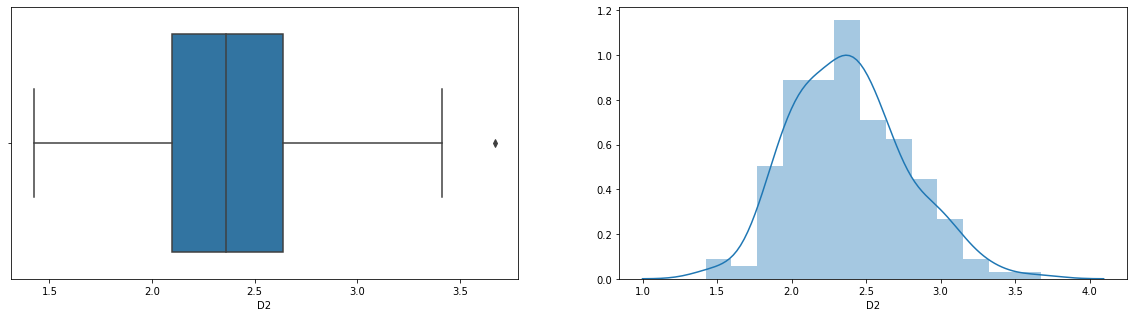

D2 of a person is 2.38
90% of the people have a value of 2.92
Skewness :  0.4303838913329283
Kurtosis :  0.22033410480833515
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for D2----------------------------

IQR is : 0.5373304999999999
Upper threshold to find outliers : 3.44245175
Lower threshold to find outliers : 1.29312975
Outliers above upper threshold : 1
Outliers below lower threshold : 0
Here are the outliers: 
89    3.671155
Name: D2, dtype: float64

Plot for D2 after fixing Outliers: 


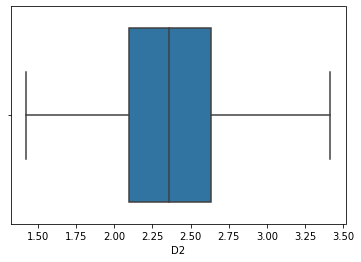




      ----------------------------UNIVARIATE ANALYSIS for DFA----------------------------



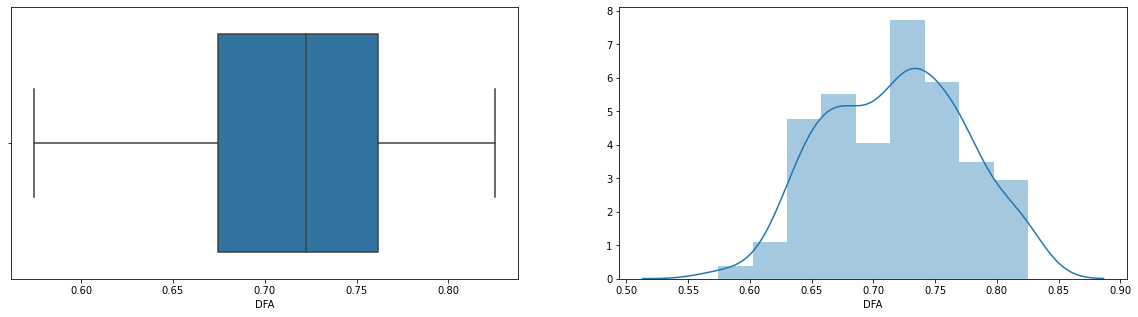

DFA of a person is 0.72
90% of the people have a value of 0.79
Skewness :  -0.03321366071383484
Kurtosis :  -0.6861518492559342
Skweness value is negative hence the data is skewed towards LEFT side
Kurtosis value is negative hence less data points are around the tail

        ----------------------------OUTLIER ANALYSIS for DFA----------------------------

IQR is : 0.08712399999999998
Upper threshold to find outliers : 0.8925675
Lower threshold to find outliers : 0.5440715

 No outliers found for: DFA



      ----------------------------UNIVARIATE ANALYSIS for HNR----------------------------



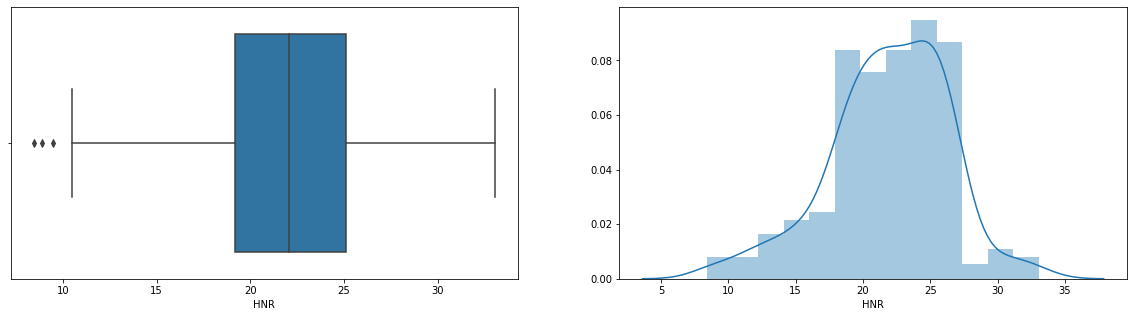

HNR of a person is 21.89
90% of the people have a value of 26.51
Skewness :  -0.5143174975652068
Kurtosis :  0.6160358344019841
Skweness value is negative hence the data is skewed towards LEFT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for HNR----------------------------

IQR is : 5.877499999999998
Upper threshold to find outliers : 33.891749999999995
Lower threshold to find outliers : 10.381750000000004

 No outliers found for: HNR



      ----------------------------UNIVARIATE ANALYSIS for Jitter:DDP----------------------------



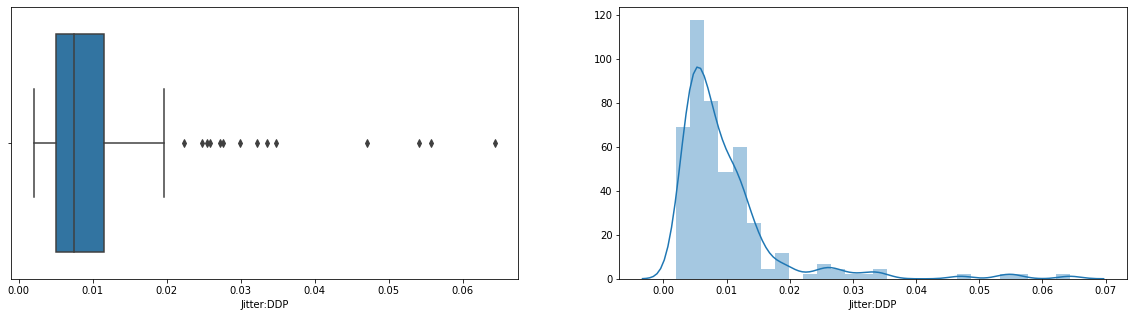

Jitter:DDP of a person is 0.01
90% of the people have a value of 0.02
Skewness :  3.3620584478857203
Kurtosis :  14.224761911379424
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for Jitter:DDP----------------------------

IQR is : 0.00652
Upper threshold to find outliers : 0.021285
Lower threshold to find outliers : -0.004795000000000001
Outliers above upper threshold : 14
Outliers below lower threshold : 0
Here are the outliers: 
97     0.02228
98     0.02478
99     0.03476
100    0.06433
101    0.02716
102    0.05563
146    0.02589
147    0.02546
148    0.02987
149    0.02756
150    0.03225
151    0.05401
152    0.04705
157    0.03351
Name: Jitter:DDP, dtype: float64

Plot for Jitter:DDP after fixing Outliers: 


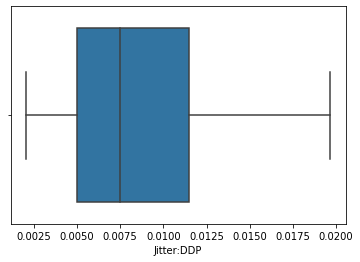




      ----------------------------UNIVARIATE ANALYSIS for MDVP:APQ----------------------------



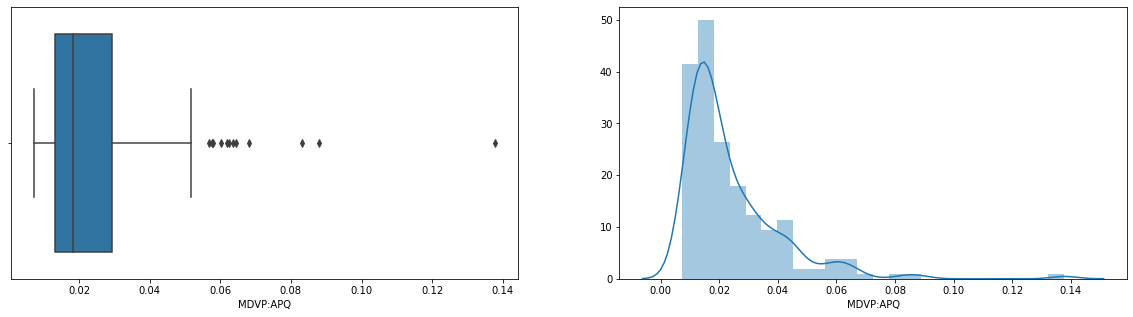

MDVP:APQ of a person is 0.02
90% of the people have a value of 0.04
Skewness :  2.618046502215422
Kurtosis :  11.163288378025502
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:APQ----------------------------

IQR is : 0.01632
Upper threshold to find outliers : 0.053880000000000004
Lower threshold to find outliers : -0.011400000000000002
Outliers above upper threshold : 12
Outliers below lower threshold : 0
Here are the outliers: 
18     0.05767
91     0.05690
99     0.05783
100    0.06196
102    0.06023
146    0.08808
147    0.06359
148    0.06824
149    0.06460
150    0.06259
151    0.13778
152    0.08318
Name: MDVP:APQ, dtype: float64

Plot for MDVP:APQ after fixing Outliers: 


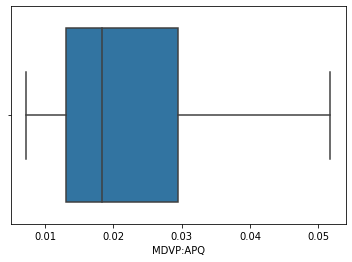




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Fhi(Hz)----------------------------



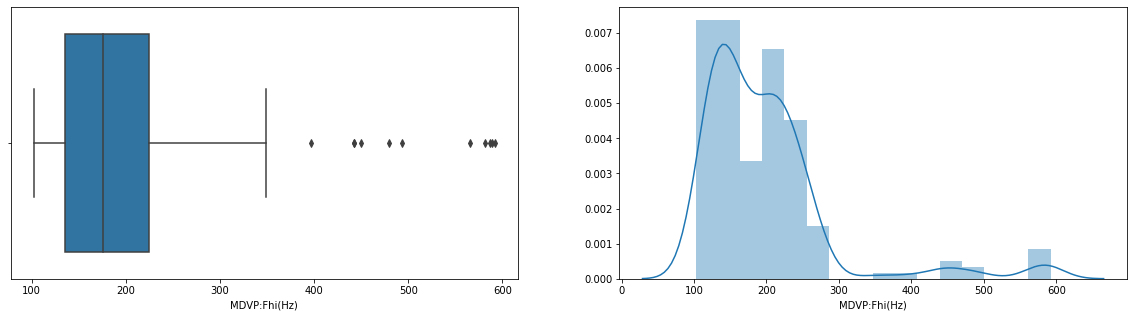

MDVP:Fhi(Hz) of a person is 197.10
90% of the people have a value of 261.00
Skewness :  2.542145997588398
Kurtosis :  7.627241211631889
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Fhi(Hz)----------------------------

IQR is : 89.34299999999999
Upper threshold to find outliers : 358.22
Lower threshold to find outliers : 0.8480000000000132
Outliers above upper threshold : 11
Outliers below lower threshold : 0
Here are the outliers: 
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64

Plot for MDVP:Fhi(Hz) after fixing Outliers: 


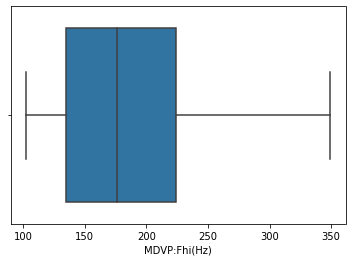




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Flo(Hz)----------------------------



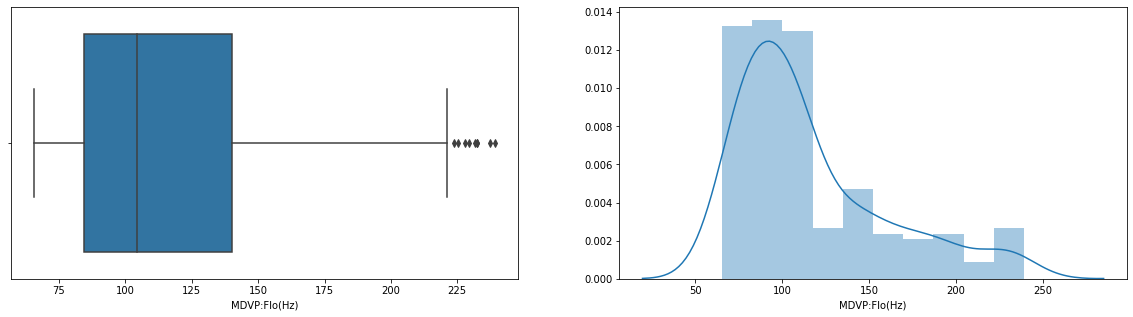

MDVP:Flo(Hz) of a person is 116.32
90% of the people have a value of 187.88
Skewness :  1.217350448627808
Kurtosis :  0.6546145211395396
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Flo(Hz)----------------------------

IQR is : 55.72750000000002
Upper threshold to find outliers : 223.60975000000005
Lower threshold to find outliers : 0.6997499999999661
Outliers above upper threshold : 9
Outliers below lower threshold : 0
Here are the outliers: 
42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
63     223.634
166    229.256
167    237.303
170    239.170
Name: MDVP:Flo(Hz), dtype: float64

Plot for MDVP:Flo(Hz) after fixing Outliers: 


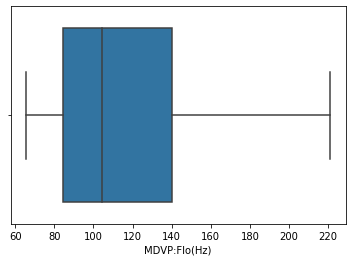




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Fo(Hz)----------------------------



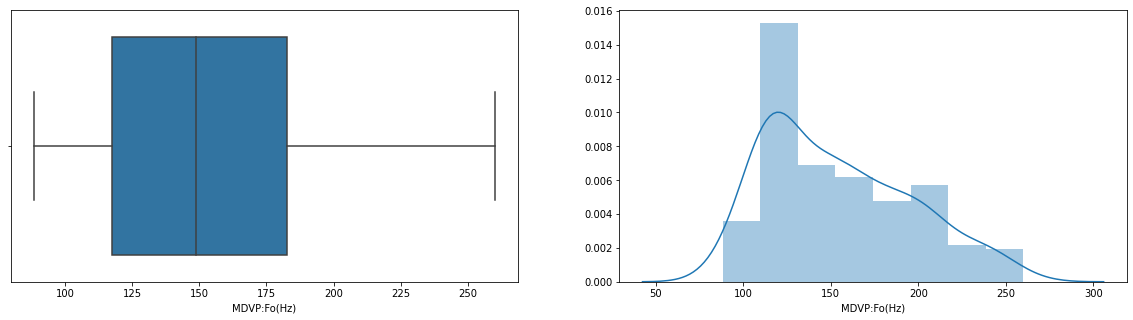

MDVP:Fo(Hz) of a person is 154.23
90% of the people have a value of 209.89
Skewness :  0.5917374636540784
Kurtosis :  -0.6278981066788805
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is negative hence less data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Fo(Hz)----------------------------

IQR is : 65.197
Upper threshold to find outliers : 280.5645
Lower threshold to find outliers : 19.7765

 No outliers found for: MDVP:Fo(Hz)



      ----------------------------UNIVARIATE ANALYSIS for MDVP:Jitter(%)----------------------------



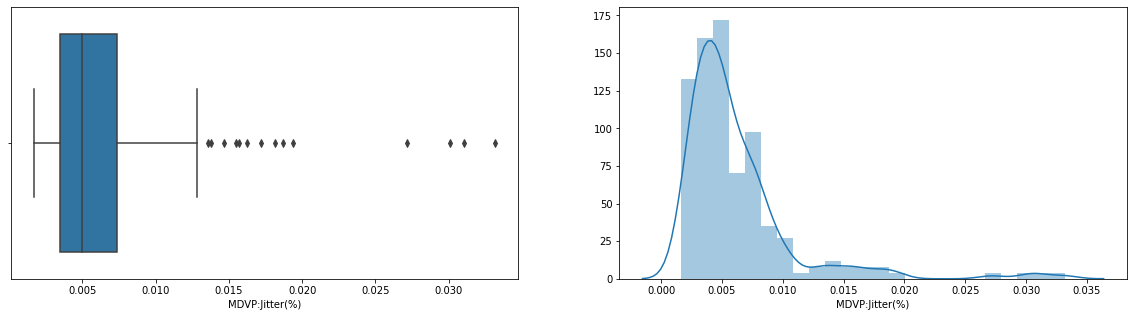

MDVP:Jitter(%) of a person is 0.01
90% of the people have a value of 0.01
Skewness :  3.0849462014441817
Kurtosis :  12.030939276179508
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Jitter(%)----------------------------

IQR is : 0.003905
Upper threshold to find outliers : 0.0132225
Lower threshold to find outliers : -0.0023975
Outliers above upper threshold : 14
Outliers below lower threshold : 0
Here are the outliers: 
98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64

Plot for MDVP:Jitter(%) after fixing Outliers: 


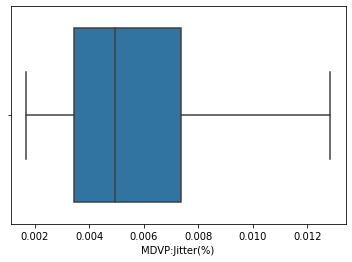




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Jitter(Abs)----------------------------



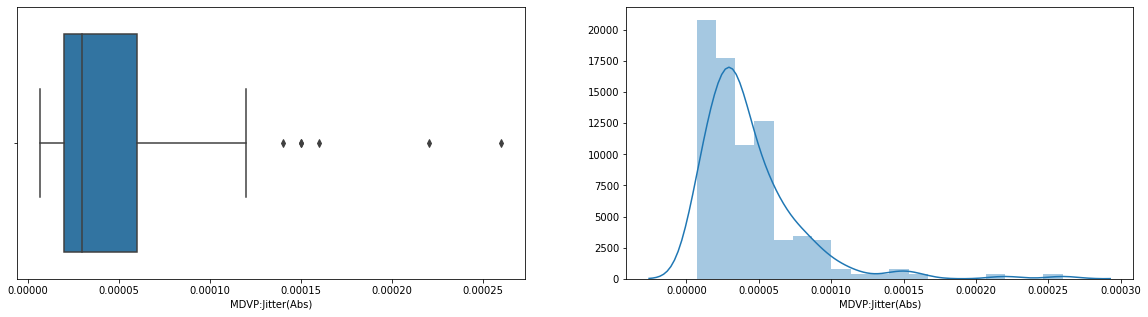

MDVP:Jitter(Abs) of a person is 0.00
90% of the people have a value of 0.00
Skewness :  2.6490714165257274
Kurtosis :  10.869042517763667
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Jitter(Abs)----------------------------

IQR is : 3.9999999999999996e-05
Upper threshold to find outliers : 0.00011999999999999999
Lower threshold to find outliers : -3.9999999999999996e-05
Outliers above upper threshold : 6
Outliers below lower threshold : 0
Here are the outliers: 
99     0.00015
100    0.00026
102    0.00022
151    0.00016
152    0.00014
157    0.00015
Name: MDVP:Jitter(Abs), dtype: float64

Plot for MDVP:Jitter(Abs) after fixing Outliers: 


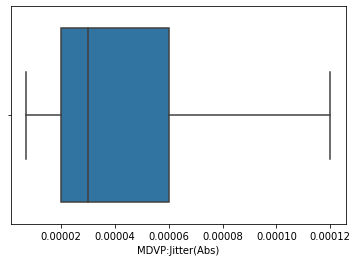




      ----------------------------UNIVARIATE ANALYSIS for MDVP:PPQ----------------------------



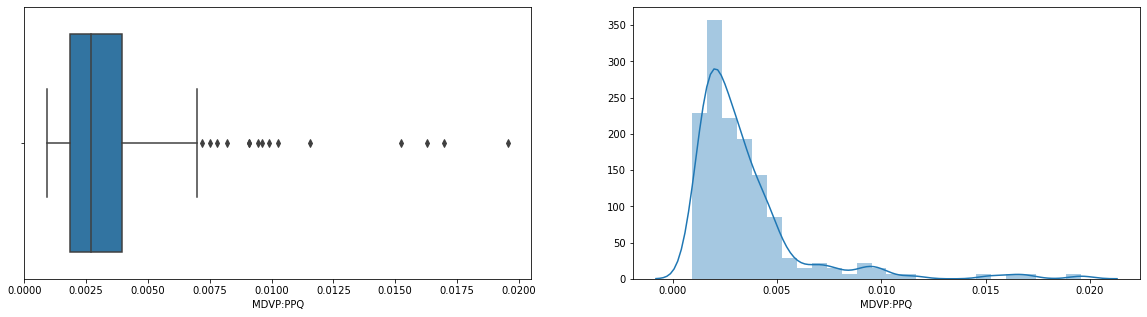

MDVP:PPQ of a person is 0.00
90% of the people have a value of 0.01
Skewness :  3.073892457888517
Kurtosis :  11.963922120220282
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:PPQ----------------------------

IQR is : 0.002095
Upper threshold to find outliers : 0.0070975000000000005
Lower threshold to find outliers : -0.0012825000000000002
Outliers above upper threshold : 15
Outliers below lower threshold : 0
Here are the outliers: 
2      0.00781
4      0.00908
5      0.00750
99     0.00990
100    0.01522
101    0.00909
102    0.01628
146    0.00946
147    0.00819
148    0.01027
149    0.00963
150    0.01154
151    0.01958
152    0.01699
157    0.00718
Name: MDVP:PPQ, dtype: float64

Plot for MDVP:PPQ after fixing Outliers: 


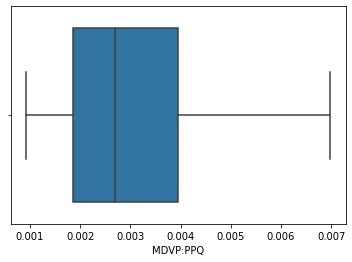




      ----------------------------UNIVARIATE ANALYSIS for MDVP:RAP----------------------------



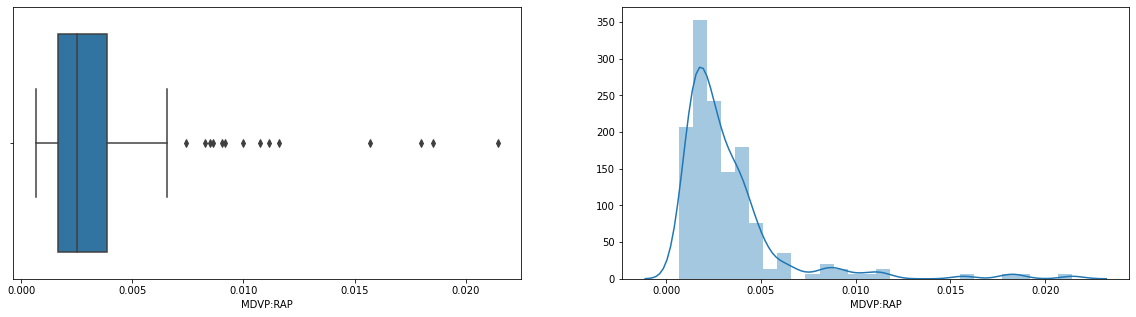

MDVP:RAP of a person is 0.00
90% of the people have a value of 0.01
Skewness :  3.360708450480554
Kurtosis :  14.213797721522418
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:RAP----------------------------

IQR is : 0.002175
Upper threshold to find outliers : 0.0070975
Lower threshold to find outliers : -0.0016024999999999995
Outliers above upper threshold : 14
Outliers below lower threshold : 0
Here are the outliers: 
97     0.00743
98     0.00826
99     0.01159
100    0.02144
101    0.00905
102    0.01854
146    0.00863
147    0.00849
148    0.00996
149    0.00919
150    0.01075
151    0.01800
152    0.01568
157    0.01117
Name: MDVP:RAP, dtype: float64

Plot for MDVP:RAP after fixing Outliers: 


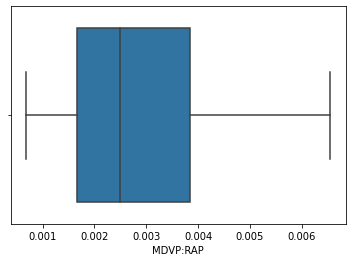




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Shimmer----------------------------



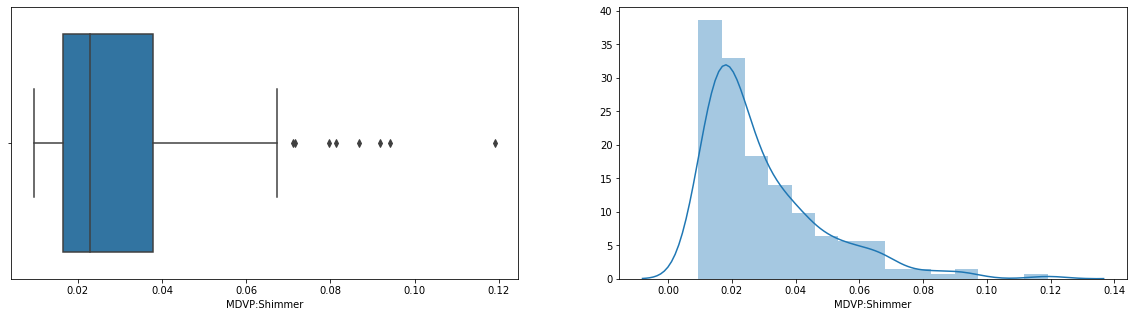

MDVP:Shimmer of a person is 0.03
90% of the people have a value of 0.06
Skewness :  1.6664804101559663
Kurtosis :  3.2383081111007535
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Shimmer----------------------------

IQR is : 0.021380000000000003
Upper threshold to find outliers : 0.069955
Lower threshold to find outliers : -0.015565000000000002
Outliers above upper threshold : 8
Outliers below lower threshold : 0
Here are the outliers: 
91     0.07959
100    0.09178
102    0.09419
146    0.08143
148    0.07118
149    0.07170
151    0.11908
152    0.08684
Name: MDVP:Shimmer, dtype: float64

Plot for MDVP:Shimmer after fixing Outliers: 


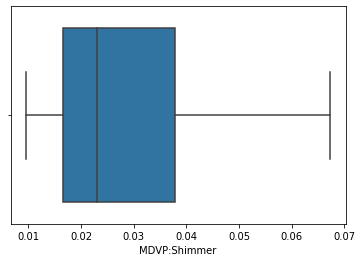




      ----------------------------UNIVARIATE ANALYSIS for MDVP:Shimmer(dB)----------------------------



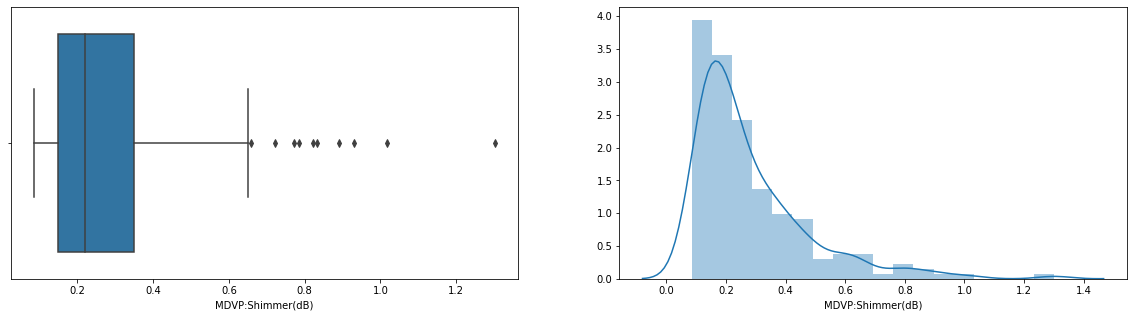

MDVP:Shimmer(dB) of a person is 0.28
90% of the people have a value of 0.53
Skewness :  1.999388639086127
Kurtosis :  5.128192509867997
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for MDVP:Shimmer(dB)----------------------------

IQR is : 0.20149999999999998
Upper threshold to find outliers : 0.65225
Lower threshold to find outliers : -0.15374999999999997
Outliers above upper threshold : 10
Outliers below lower threshold : 0
Here are the outliers: 
91     0.772
99     0.659
100    0.891
102    0.930
146    0.821
148    0.722
149    0.833
150    0.784
151    1.302
152    1.018
Name: MDVP:Shimmer(dB), dtype: float64

Plot for MDVP:Shimmer(dB) after fixing Outliers: 


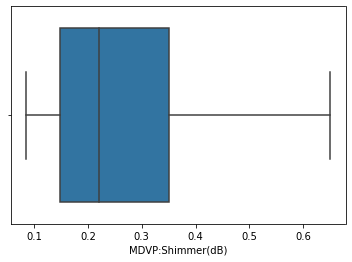




      ----------------------------UNIVARIATE ANALYSIS for NHR----------------------------



NHR of a person is 0.02
90% of the people have a value of 0.05
Skewness :  4.22070912913906
Kurtosis :  21.994974114984924
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for NHR----------------------------

IQR is : 0.019715
Upper threshold to find outliers : 0.0552125
Lower threshold to find outliers : -0.023647500000000002
Outliers above upper threshold : 19
Outliers below lower threshold : 0
Here are the outliers: 
89     0.07223
90     0.08725
97     0.08151
98     0.10323
99     0.16744
100    0.31482
101    0.11843
102    0.25930
115    0.06051
146    0.07530
147    0.06057
148    0.08069
149    0.07889
150    0.10952
151    0.21713
152    0.16265
157    0.10748
192    0.10715
193    0.07223
Name: NHR, dtype: float64

Plot for NHR after fixing Outliers: 


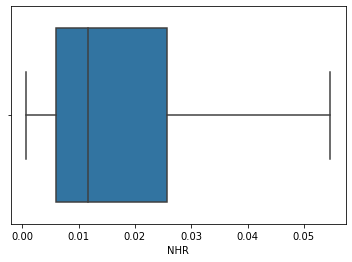




      ----------------------------UNIVARIATE ANALYSIS for PPE----------------------------



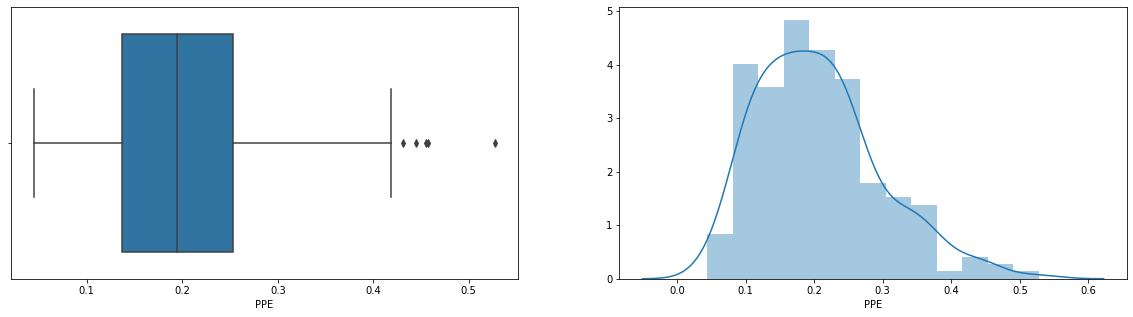

PPE of a person is 0.21
90% of the people have a value of 0.33
Skewness :  0.7974910716463578
Kurtosis :  0.5283349472852588
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for PPE----------------------------

IQR is : 0.11552899999999999
Upper threshold to find outliers : 0.42627349999999997
Lower threshold to find outliers : -0.0358425
Outliers above upper threshold : 5
Outliers below lower threshold : 0
Here are the outliers: 
17     0.430788
102    0.444774
146    0.457533
151    0.527367
152    0.454721
Name: PPE, dtype: float64

Plot for PPE after fixing Outliers: 


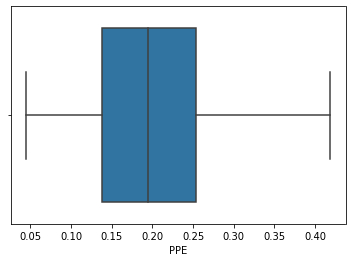




      ----------------------------UNIVARIATE ANALYSIS for RPDE----------------------------



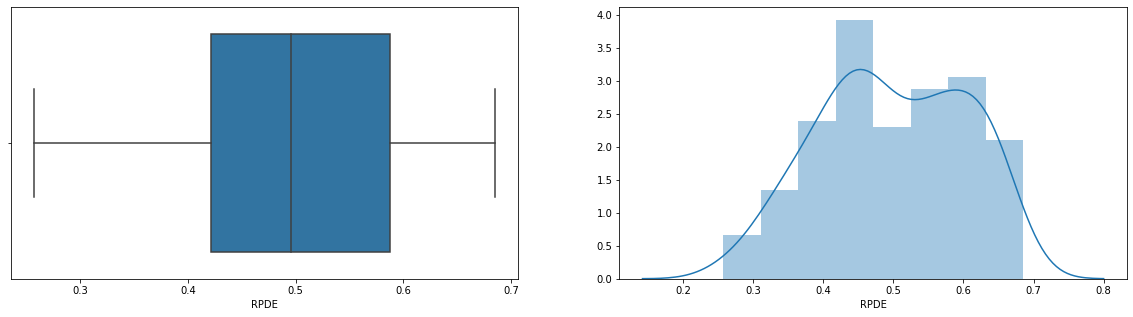

RPDE of a person is 0.50
90% of the people have a value of 0.64
Skewness :  -0.14340241379821705
Kurtosis :  -0.9217809777573227
Skweness value is negative hence the data is skewed towards LEFT side
Kurtosis value is negative hence less data points are around the tail

        ----------------------------OUTLIER ANALYSIS for RPDE----------------------------

IQR is : 0.16625649999999997
Upper threshold to find outliers : 0.8369472499999999
Lower threshold to find outliers : 0.17192125000000005

 No outliers found for: RPDE



      ----------------------------UNIVARIATE ANALYSIS for Shimmer:APQ3----------------------------



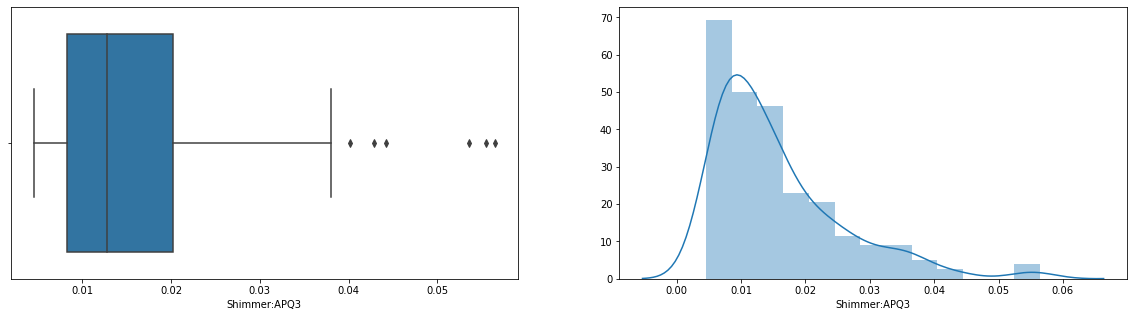

Shimmer:APQ3 of a person is 0.02
90% of the people have a value of 0.03
Skewness :  1.5805763798815677
Kurtosis :  2.7201516395960734
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for Shimmer:APQ3----------------------------

IQR is : 0.012019999999999998
Upper threshold to find outliers : 0.038294999999999996
Lower threshold to find outliers : -0.009784999999999997
Outliers above upper threshold : 6
Outliers below lower threshold : 0
Here are the outliers: 
91     0.04421
100    0.05358
102    0.05551
141    0.04016
151    0.05647
152    0.04284
Name: Shimmer:APQ3, dtype: float64

Plot for Shimmer:APQ3 after fixing Outliers: 


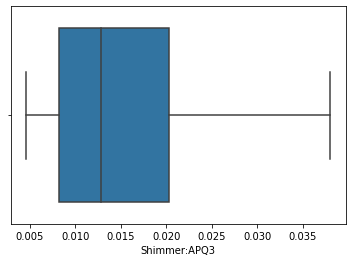




      ----------------------------UNIVARIATE ANALYSIS for Shimmer:APQ5----------------------------



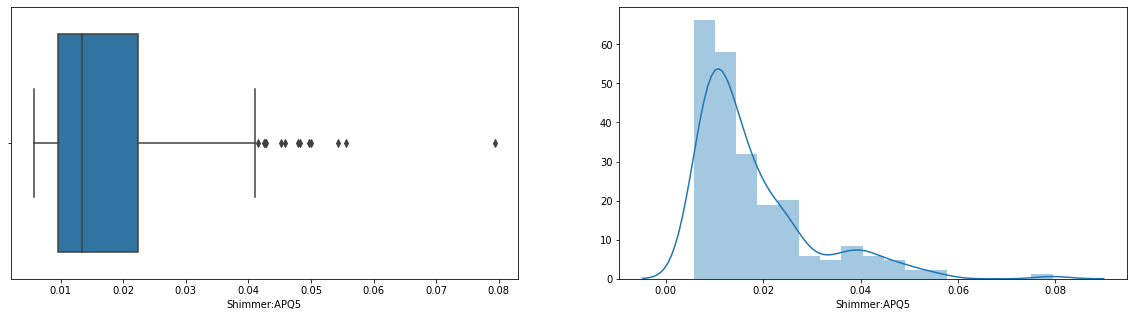

Shimmer:APQ5 of a person is 0.02
90% of the people have a value of 0.04
Skewness :  1.798697066537622
Kurtosis :  3.8742096517587257
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for Shimmer:APQ5----------------------------

IQR is : 0.012799999999999999
Upper threshold to find outliers : 0.04158
Lower threshold to find outliers : -0.009619999999999997
Outliers above upper threshold : 13
Outliers below lower threshold : 0
Here are the outliers: 
1      0.04518
4      0.04825
87     0.04159
88     0.04254
90     0.04282
91     0.04962
100    0.04791
102    0.05005
146    0.05426
148    0.04580
149    0.04265
151    0.07940
152    0.05556
Name: Shimmer:APQ5, dtype: float64

Plot for Shimmer:APQ5 after fixing Outliers: 


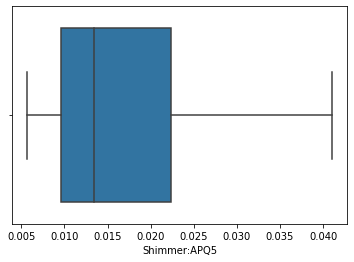




      ----------------------------UNIVARIATE ANALYSIS for Shimmer:DDA----------------------------



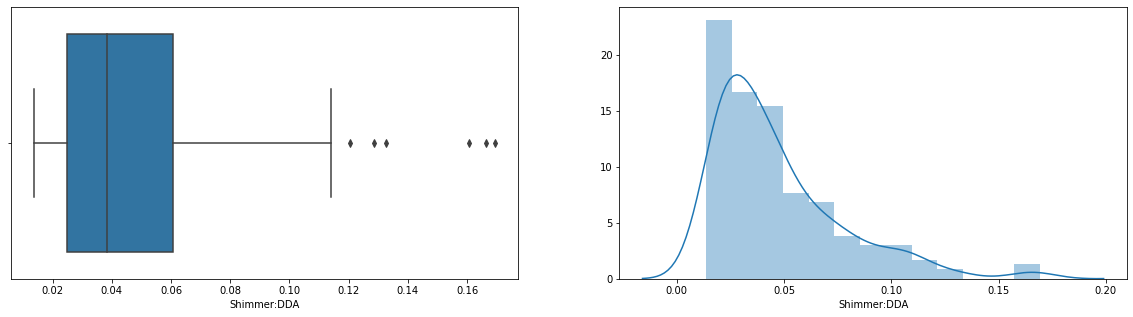

Shimmer:DDA of a person is 0.05
90% of the people have a value of 0.09
Skewness :  1.5806179936782263
Kurtosis :  2.720661344498221
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is postive hence the more data points are around the tail

        ----------------------------OUTLIER ANALYSIS for Shimmer:DDA----------------------------

IQR is : 0.03606
Upper threshold to find outliers : 0.114885
Lower threshold to find outliers : -0.029355
Outliers above upper threshold : 6
Outliers below lower threshold : 0
Here are the outliers: 
91     0.13262
100    0.16074
102    0.16654
141    0.12047
151    0.16942
152    0.12851
Name: Shimmer:DDA, dtype: float64

Plot for Shimmer:DDA after fixing Outliers: 


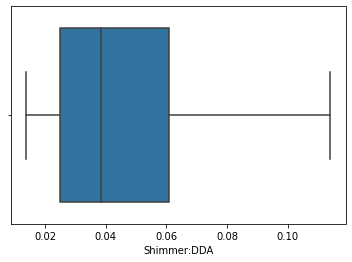




      ----------------------------UNIVARIATE ANALYSIS for spread1----------------------------



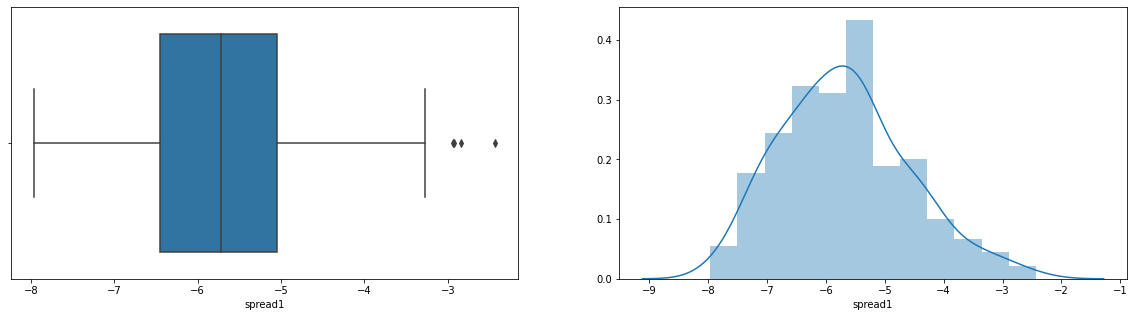

spread1 of a person is -5.68
90% of the people have a value of -4.26
Skewness :  0.4321389320131796
Kurtosis :  -0.05019918161280801
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is negative hence less data points are around the tail

        ----------------------------OUTLIER ANALYSIS for spread1----------------------------

IQR is : 1.4039040000000007
Upper threshold to find outliers : -2.9403359999999985
Lower threshold to find outliers : -8.555952000000001
Outliers above upper threshold : 4
Outliers below lower threshold : 0
Here are the outliers: 
17    -2.931070
151   -2.434031
152   -2.839756
164   -2.929379
Name: spread1, dtype: float64

Plot for spread1 after fixing Outliers: 


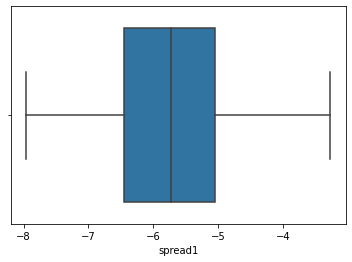




      ----------------------------UNIVARIATE ANALYSIS for spread2----------------------------



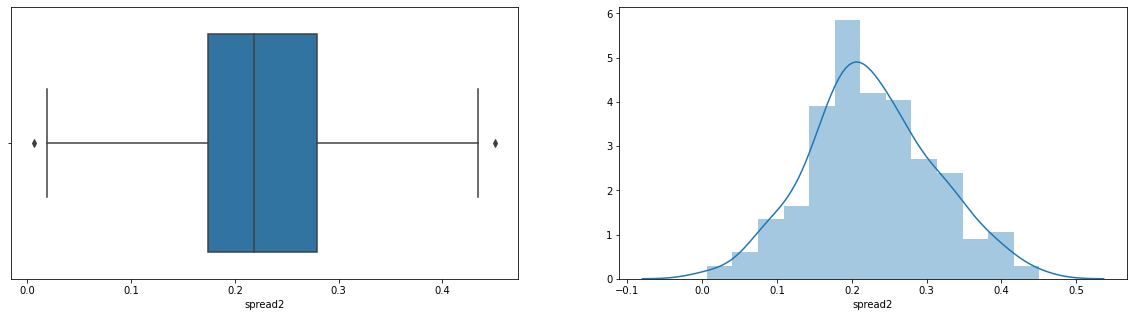

spread2 of a person is 0.23
90% of the people have a value of 0.34
Skewness :  0.14443048549278412
Kurtosis :  -0.08302289327680024
Skweness value is positive hence the data is skewed towards RIGHT side
Kurtosis value is negative hence less data points are around the tail

        ----------------------------OUTLIER ANALYSIS for spread2----------------------------

IQR is : 0.10488349999999996
Upper threshold to find outliers : 0.43655924999999995
Lower threshold to find outliers : 0.017025250000000075
Outliers above upper threshold : 1
Outliers below lower threshold : 1
Here are the outliers: 
151    0.450493
Name: spread2, dtype: float64

Plot for spread2 after fixing Outliers: 


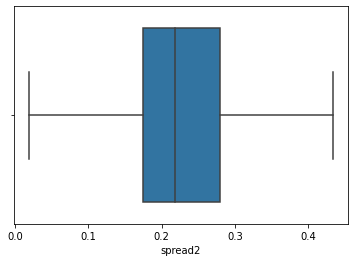

In [ ]:
#this steps does the univariate analysis for all the columns except name and status, and also analyses and fixes the outlers if any
df2 = df[df.columns.difference(['name', 'status'])]

for col in df2.columns:
    Univariate_Analysis(col)


<font color=blue size="6">**BiVariate Analysis**</font>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


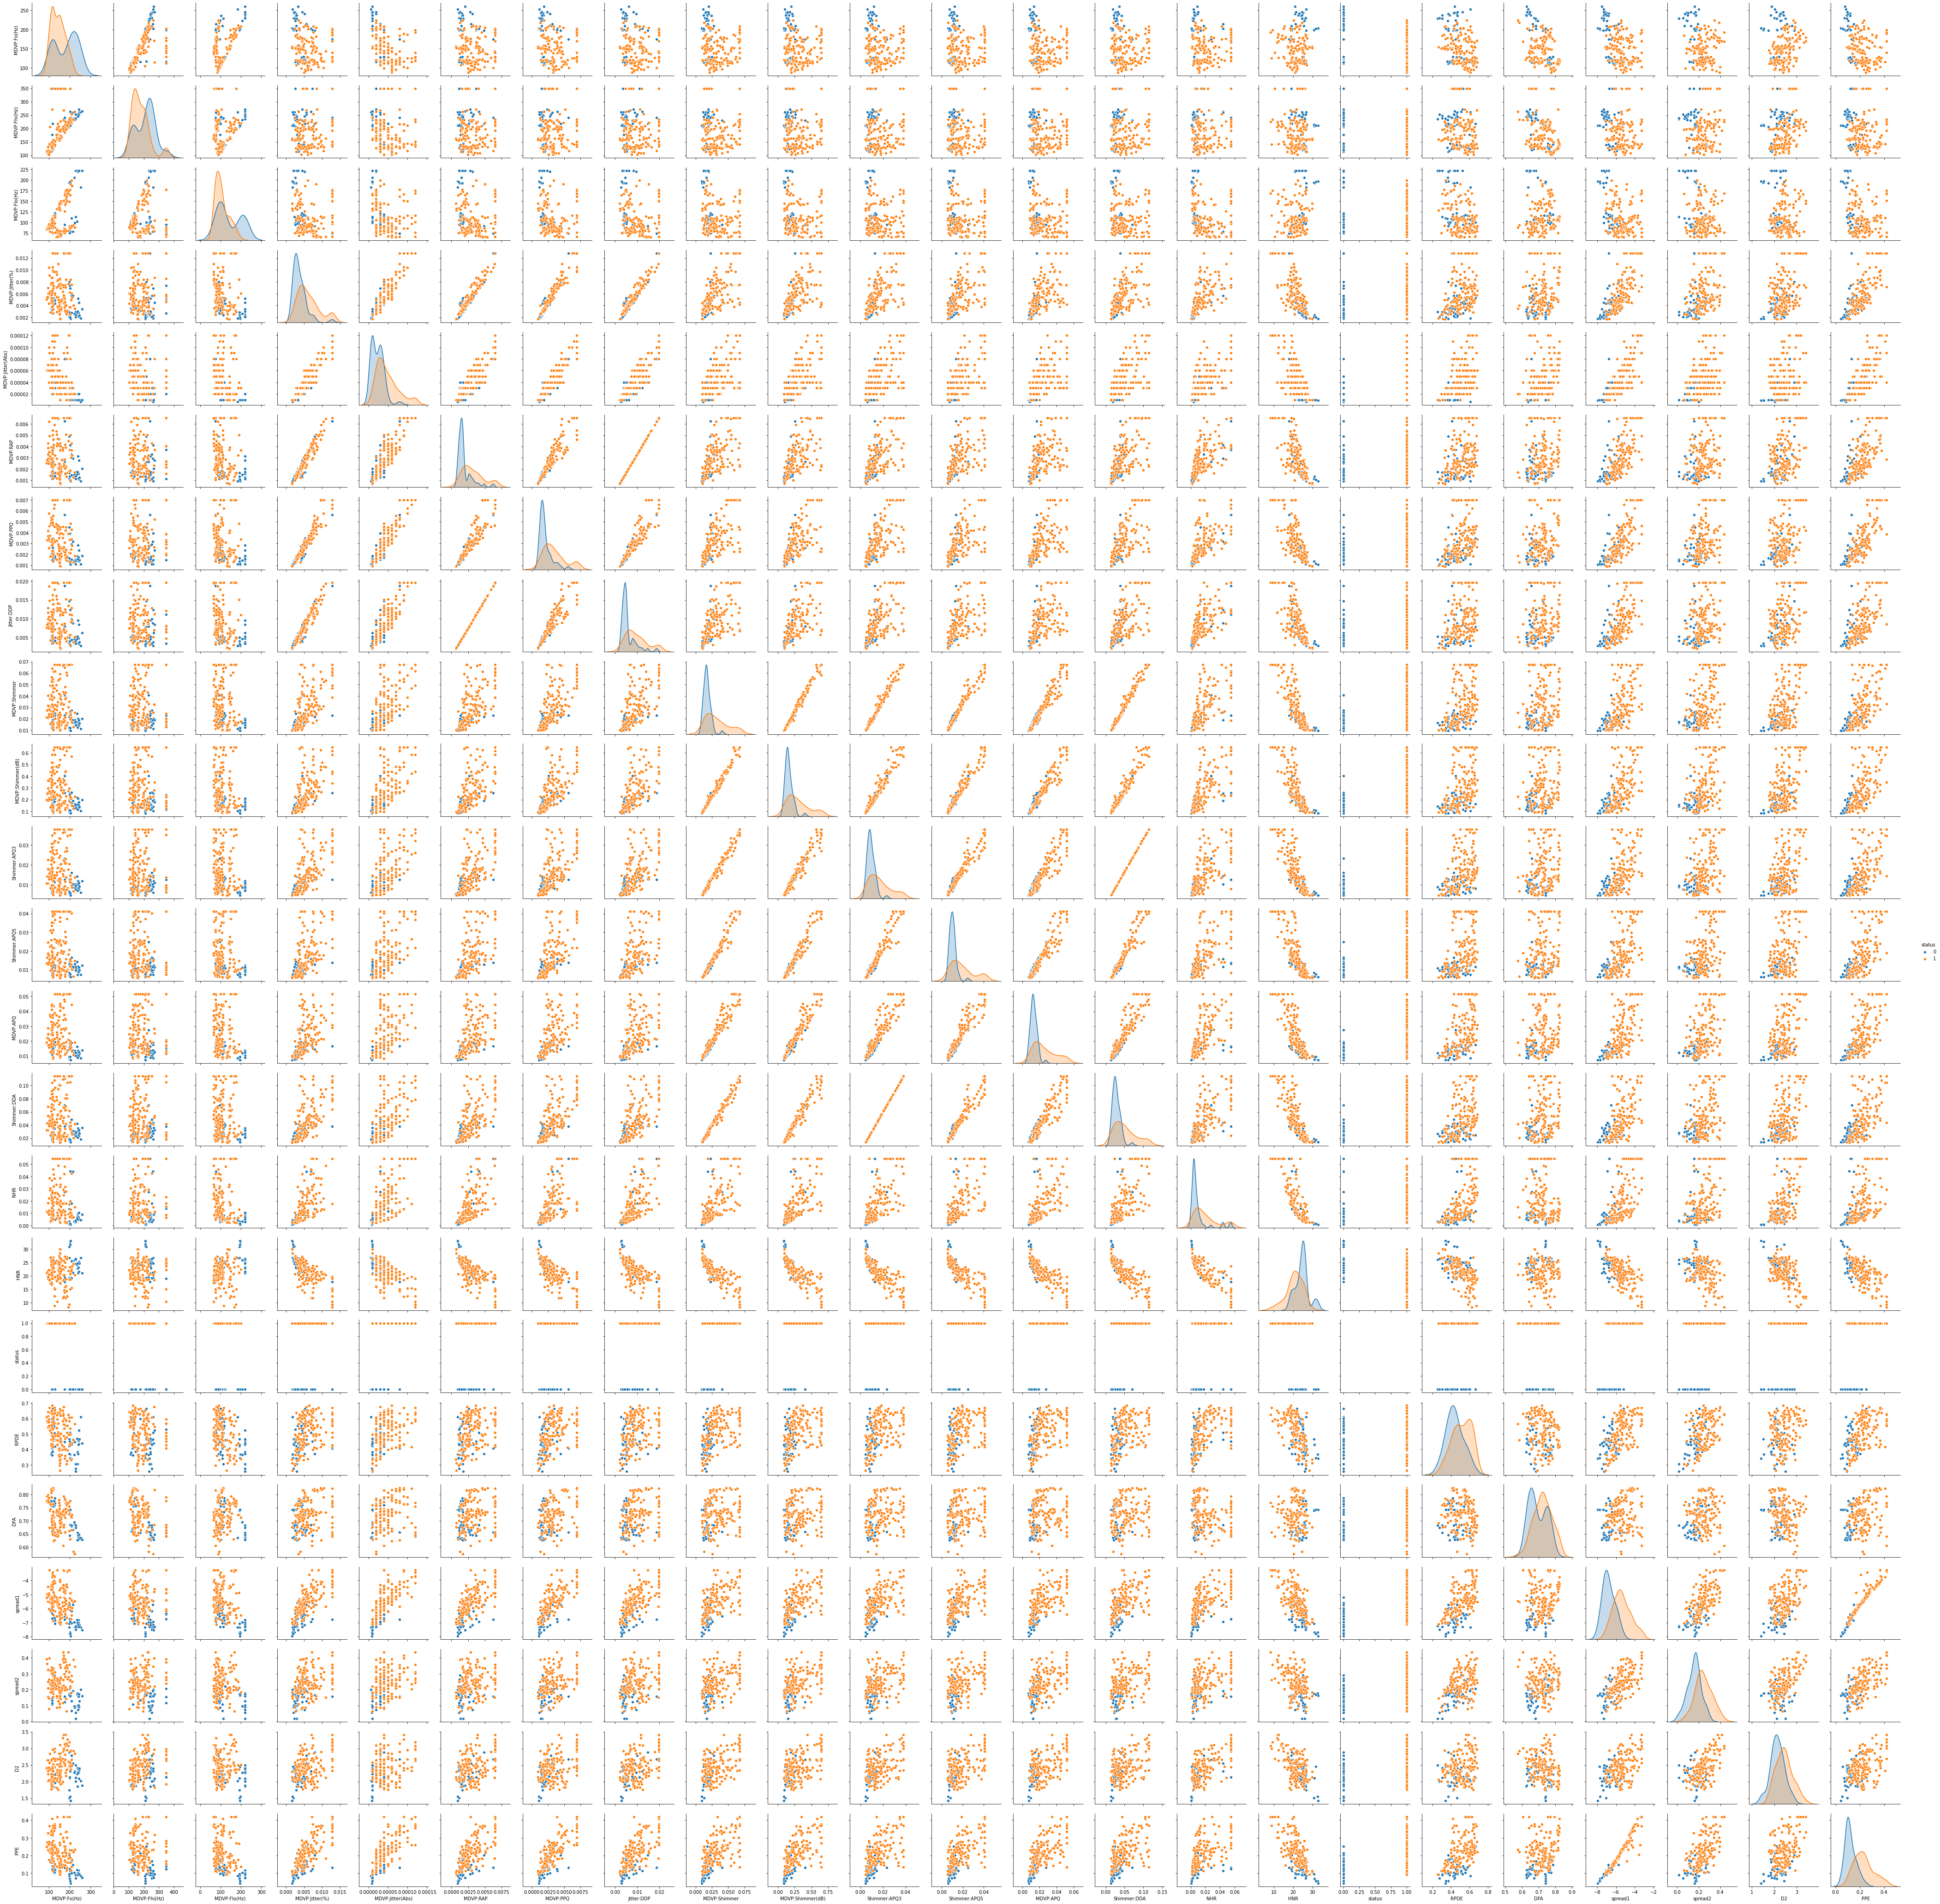

In [ ]:
sns.pairplot(df , hue='status' , diag_kind = 'kde')

In [ ]:
#Dropping columns with variance less than 1.0

df2 = df[df.columns.difference(['name', 'status'])]

for columns in df2.select_dtypes(include=['int64']).columns:
    print(columns,df[columns].var())
    if df[columns].var()<1.0:
        df.drop(columns,axis=1, inplace=True)


In [ ]:
df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.637029      0.589410       -0.219327   
MDVP:Fhi(Hz)         0.637029      1.000000      0.191696       -0.029259   
MDVP:Flo(Hz)         0.589410      0.191696      1.000000       -0.281416   
MDVP:Jitter(%)      -0.219327     -0.029259     -0.281416        1.000000   
MDVP:Jitter(Abs)    -0.461549     -0.215770     -0.338035        0.931194   
MDVP:RAP            -0.160884     -0.033409     -0.249012        0.976043   
MDVP:PPQ            -0.242483     -0.061756     -0.246206        0.968969   
Jitter:DDP          -0.160872     -0.033434     -0.248832        0.976093   
MDVP:Shimmer        -0.130340     -0.073803     -0.191298        0.703456   
MDVP:Shimmer(dB)    -0.128032     -0.048452     -0.196252        0.727889   
Shimmer:APQ3        -0.109751     -0.074639     -0.172637        0.683988   
Shimmer:APQ5        -0.105088     -0.062302     -0.152794        0.673958   
MDVP:APQ            -0.167800     -0.079520     -0.228219        0.679136   
Shimmer:DDA         -0.109771     -0.074653     -0.172631        0.683988   
NHR                 -0.044456      0.132989     -0.269014        0.775867   
HNR                  0.059144     -0.021457      0.213442       -0.737151   
status              -0.383535     -0.231888     -0.371969        0.353339   
RPDE                -0.383894     -0.175275     -0.405818        0.405932   
DFA                 -0.446013     -0.443810     -0.036048        0.195141   
spread1             -0.427997     -0.173022     -0.405549        0.751016   
spread2             -0.250138     -0.044843     -0.241823        0.416972   
D2                   0.177724      0.226164     -0.100820        0.433411   
PPE                 -0.394897     -0.162126     -0.358993        0.764589   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.461549 -0.160884 -0.242483   -0.160872   
MDVP:Fhi(Hz)             -0.215770 -0.033409 -0.061756   -0.033434   
MDVP:Flo(Hz)             -0.338035 -0.249012 -0.246206   -0.248832   
MDVP:Jitter(%)            0.931194  0.976043  0.968969    0.976093   
MDVP:Jitter(Abs)          1.000000  0.890449  0.923281    0.890536   
MDVP:RAP                  0.890449  1.000000  0.945663    0.999999   
MDVP:PPQ                  0.923281  0.945663  1.000000    0.945684   
Jitter:DDP                0.890536  0.999999  0.945684    1.000000   
MDVP:Shimmer              0.658451  0.693193  0.733176    0.693249   
MDVP:Shimmer(dB)          0.680241  0.713873  0.756223    0.713911   
Shimmer:APQ3              0.640217  0.683093  0.708579    0.683148   
Shimmer:APQ5              0.628094  0.662054  0.732258    0.662124   
MDVP:APQ                  0.639044  0.653960  0.704250    0.654046   
Shimmer:DDA               0.640222  0.683086  0.708586    0.683142   
NHR                       0.671352  0.772707  0.711897    0.772725   
HNR                      -0.657980 -0.739894 -0.739150   -0.739962   
status                    0.390745  0.352441  0.368845    0.352437   
RPDE                      0.471696  0.384080  0.392511    0.383992   
DFA                       0.279301  0.173681  0.292888    0.173598   
spread1                   0.788124  0.695876  0.777851    0.695988   
spread2                   0.437851  0.327899  0.424858    0.327925   
D2                        0.306535  0.425126  0.393539    0.425200   
PPE                       0.796291  0.702261  0.811798    0.702382   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.130340         -0.128032  ...    -0.109771 -0.044456   
MDVP:Fhi(Hz)         -0.073803         -0.048452  ...    -0.074653  0.132989   
MDVP:Flo(Hz)         -0.191298         -0.196252  ...    -0.172631 -0.269014   
MDVP:Jitter(%)        0.703456          0.727889  ...     0.683988  0.775867   
MDVP:Jitter(Abs)      0.658451          0.680241  ...     0.640222  0.671352   
MDVP:RAP

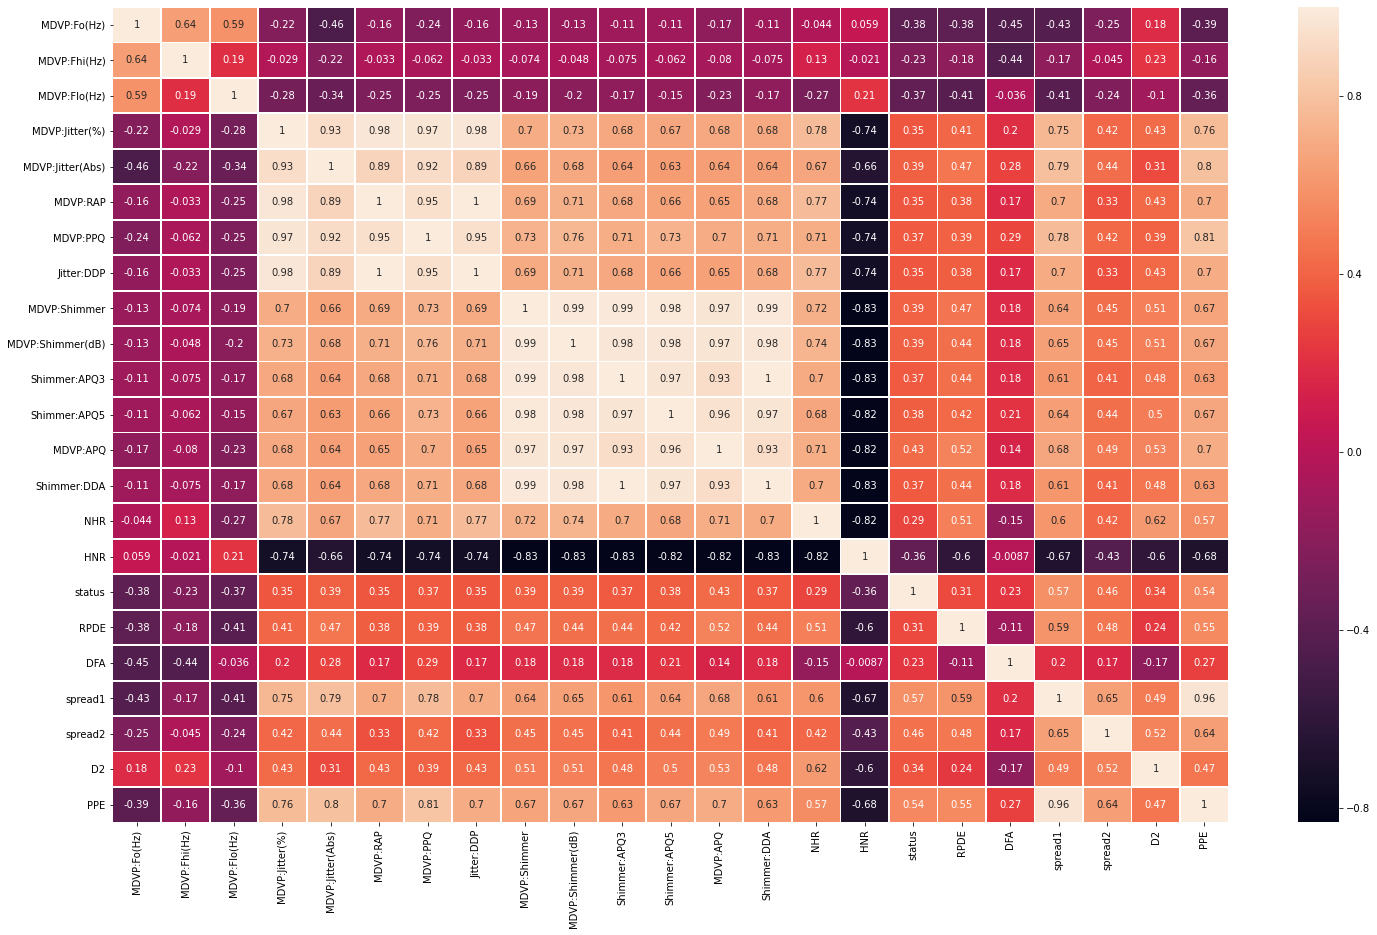

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)
plt.show()


 <font color=blue> MDVP:Jitter(Abs), MDVP:Jitter(%) - highly correlated - one of them can be dropped</font>



<font color=blue>MDVP:Shimmer', 'MDVP:Shimmer(dB)' - highly correlated - one of them can be dropped</font>


 <font color=blue> 'MDVP:RAP', 'MDVP:PPQ' -  highly correlated - one of them can be dropped</font>


 <font color=blue>'Shimmer:APQ3', 'Shimmer:APQ5'  - highly correlated - one of them can be dropped</font>

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).


In [ ]:

df2 = df[df.columns.difference(['name', 'status','MDVP:Jitter(%)','MDVP:Shimmer(dB)', 'Shimmer:APQ5','MDVP:RAP','spread1','Jitter:DDP'])]

X =  df2
y = df["status"]

In [ ]:
train_set, test_set, train_labels, test_labels = train_test_split(X,y,train_size=.3,random_state=1,stratify=y)
train_set.shape


(58, 16)

In [ ]:
df2.columns

Index(['D2', 'DFA', 'HNR', 'MDVP:APQ', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer', 'NHR',
       'PPE', 'RPDE', 'Shimmer:APQ3', 'Shimmer:DDA', 'spread2'],
      dtype='object')

## 5. Create the model using “entropy” method of reducing the entropy and fit it to training
## data. (5 points)


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )


In [ ]:
dt_model.fit(train_set, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted
## values and do a crosstab. (7.5 points)

In [ ]:
y_predict = dt_model.predict(test_set)


In [ ]:
print("Score for trianing set is ",dt_model.score(train_set , train_labels))
print("Score for testing set is ",dt_model.score(test_set , test_labels))

Score for trianing set is  1.0
Score for testing set is  0.8175182481751825


In [ ]:
print(metrics.confusion_matrix(test_labels, y_predict))
print(metrics.classification_report(test_labels, y_predict))

[[22 12]
 [13 90]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        34
           1       0.88      0.87      0.88       103

    accuracy                           0.82       137
   macro avg       0.76      0.76      0.76       137
weighted avg       0.82      0.82      0.82       137



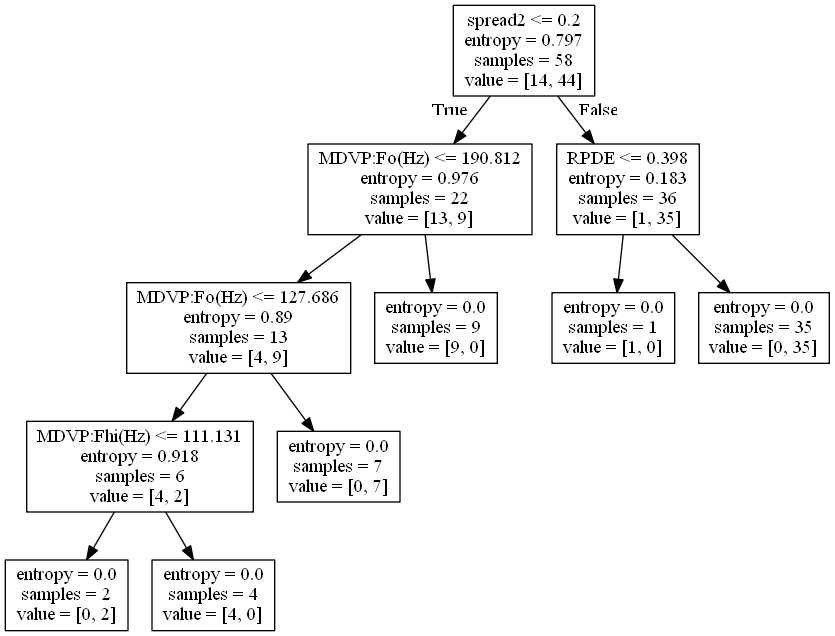

In [ ]:
from IPython.display import Image
import pydotplus as pydot
from sklearn import tree
from os import system
# import graphviz


Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(train_set))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")

from subprocess import call
# call(['dot', '-Tpng', 'parkinson.dot', '-o', 'parkinson.png', '-Gdpi=600'])

Image("parkinson.png")

## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
## What is the impact on the model accuracy? How does regularization help? (20 points)



<font color=blue size="4">**Acurracy Vs Depth**</font>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

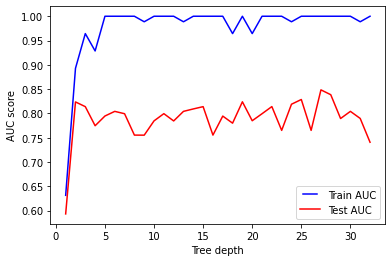

In [ ]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(train_set, train_labels)
   train_pred = rf.predict(train_set)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(test_set)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

**From the above graph its clear that the model overfits for large depth values.**

**The trees perfectly predicts all of the train data**

**Model fails to generalize the findings for new data**

**For tree depth>4 the model accuracy suffers and it becomes a overfit**



<font color=blue size="5">Accuracy VS min_sample_leaf</font>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

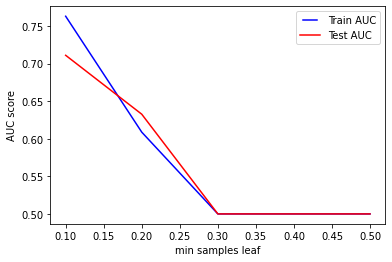

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(train_set, train_labels)
   train_pred = rf.predict(train_set)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(test_set)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()



<font color=blue size="5">**As the min_sample_leaf value increases the model becomes underfit**</font>

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4,min_samples_leaf=.12)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_predict = reg_dt_model.predict(test_set)


In [ ]:
print("Score for trianing set is ",reg_dt_model.score(train_set , train_labels))
print("Score for testing set is ",reg_dt_model.score(test_set , test_labels))

Score for trianing set is  0.9137931034482759
Score for testing set is  0.8832116788321168


In [ ]:
print(metrics.confusion_matrix(test_labels, y_predict))
print(metrics.classification_report(test_labels, y_predict))

[[ 21  13]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.72        34
           1       0.88      0.97      0.93       103

    accuracy                           0.88       137
   macro avg       0.88      0.79      0.83       137
weighted avg       0.88      0.88      0.88       137





<font color=blue size="4">**Tweaking the values of max_depth and min_samples_leaf has resulted in a better accuracy score**</font>

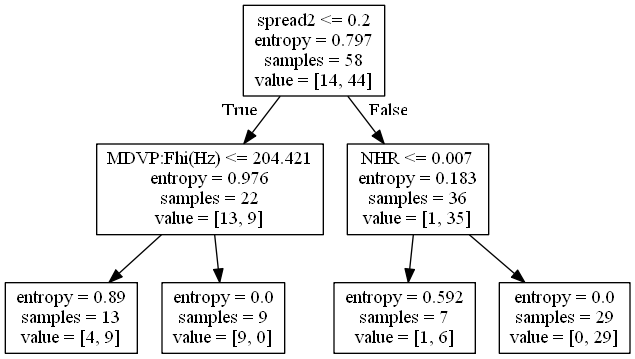

In [ ]:
Parkinson_File_reg = open('parkinson_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Parkinson_File_reg, feature_names = list(train_set))

Parkinson_File_reg.close()

system("dot -Tpng parkinson_reg.dot -o parkinson_reg.png")
Image("parkinson_reg.png")

## 8. Next implement the decision tree using Random Forest and find the accuracy (10 points)

In [ ]:

rfcl = RandomForestClassifier(n_estimators = 212)
rfcl = rfcl.fit(train_set, train_labels)

In [ ]:

y_predict = rfcl.predict(test_set)
print("Score for trianing set is ",rfcl.score(train_set , train_labels))
print("Score for testing set is ",rfcl.score(test_set , test_labels))


Score for trianing set is  1.0
Score for testing set is  0.8905109489051095


In [ ]:
print(metrics.confusion_matrix(test_labels, y_predict))
print(metrics.classification_report(test_labels, y_predict))

[[22 12]
 [ 5 98]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        34
           1       0.89      0.95      0.92       103

    accuracy                           0.88       137
   macro avg       0.85      0.80      0.82       137
weighted avg       0.87      0.88      0.87       137

